In [8]:
from os import listdir
from os.path import isfile, join
from signal import signal
import multiprocessing as mp
from functools import partial
#from joblib import Parallel, delayed
#import numpy
#from scipy.stats import kendalltau
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import seaborn as sns
import pandas as pd
import networkx as nx
from scipy.stats import gaussian_kde
import igraph as ig
import mat73
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors import KernelDensity 
import numba as nb



In [9]:
data_dict = mat73.loadmat("D:/pythonProject/work/diplom/smoothed_video.mat")
data = data_dict['smoothed_video']
arr3D = np.asarray(data)
arr3D = data.transpose(2, 0, 1)

In [10]:
# mypath='C:/Users/rusan/AppData/Local/Programs/Python/Python311/work/diplom/imagePage'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# images = numpy.empty(len(onlyfiles), dtype=object)
# arr3D = np.empty((1200,512,512), dtype='uint8')
# for n in range(0, len(onlyfiles)):
#     tmp = cv2.imread(join(mypath,onlyfiles[n]), 0)
#     arrTmp = np.asarray(tmp)
#     arrTmp = cv2.GaussianBlur(arrTmp, (7, 7),0) #19,19
#     images[n] = arrTmp
#     arr3D[n] = images[n]

In [11]:
def bildHist2d(i1, i2, j1, j2):
    cellOver = arr3D[:300, i1:i2, j1:j2]
    i1, i2, j1, j2 = 10,20,0,10 # вне
    cellOver1 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver1 = cellOver1.astype(float)
    intens = cellOver1.reshape(300*(i2-i1)*(j2-j1),)
    time = []
    for i in range(300):
        for j in range((i2-i1)*(j2-j1)):
            time.append(i)
    xedges = range(300)
    yedges = yedges = np.linspace(0, np.amax(cellOver1), 100) # 53

    h, x, y = np.histogram2d(time, intens, bins=[xedges, yedges])
    for i in range(h.shape[0]):
        tmp = [x / h[i,:].max() for x in h[i,:]]
        h[i,:] = tmp
    plt.imshow(h.T, origin = 'lower', cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.title("Вне клетки")
    plt.savefig("./Вне клетки.png")
    plt.show()
    i1, i2, j1, j2 = 20,30,35,45 # право
    cellOver2 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver2 = cellOver2.astype(float)
    intens = cellOver2.reshape(300*(i2-i1)*(j2-j1),)
    time = []
    for i in range(300):
        for j in range((i2-i1)*(j2-j1)):
            time.append(i)
    xedges = range(300)
    yedges = yedges = np.linspace(0, np.amax(cellOver2), 100) # 53

    h, x, y = np.histogram2d(time, intens, bins=[xedges, yedges])
    for i in range(h.shape[0]):
        tmp = [x / h[i,:].max() for x in h[i,:]]
        h[i,:] = tmp
    plt.imshow(h.T, origin = 'lower', cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.title("Правая клетка")
    plt.savefig("./Правая клетка.png")
    plt.show()
    i1, i2, j1, j2 = 38,48,0,10 # низ
    cellOver3 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver3 = cellOver3.astype(float)
    intens = cellOver3.reshape(300*(i2-i1)*(j2-j1),)
    time = []
    for i in range(300):
        for j in range((i2-i1)*(j2-j1)):
            time.append(i)
    xedges = range(300)
    yedges = yedges = np.linspace(0, np.amax(cellOver3), 100) # 53

    h, x, y = np.histogram2d(time, intens, bins=[xedges, yedges])
    for i in range(h.shape[0]):
        tmp = [x / h[i,:].max() for x in h[i,:]]
        h[i,:] = tmp
    plt.imshow(h.T, origin = 'lower', cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.title("Нижняя клетка")
    plt.savefig("./Нижняя клетка.png")
    plt.show()
    i1, i2, j1, j2 = 10,25,12,28 # верх
    cellOver4 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver4 = cellOver4.astype(float)
    intens = cellOver4.reshape(300*(i2-i1)*(j2-j1),)
    time = []
    for i in range(300):
        for j in range((i2-i1)*(j2-j1)):
            time.append(i)
    xedges = range(300)
    yedges = yedges = np.linspace(0, np.amax(cellOver4), 100) # 53

    h, x, y = np.histogram2d(time, intens, bins=[xedges, yedges])
    for i in range(h.shape[0]):
        tmp = [x / h[i,:].max() for x in h[i,:]]
        h[i,:] = tmp
    plt.imshow(h.T, origin = 'lower', cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.title("Верхняя клетка")
    plt.savefig("./Верхняя клетка.png")
    plt.show()
    i1, i2, j1, j2 = 25,34,16,28 # центр
    cellOver5 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver5 = cellOver5.astype(float)
    intens = cellOver5.reshape(300*(i2-i1)*(j2-j1),)
    time = []
    for i in range(300):
        for j in range((i2-i1)*(j2-j1)):
            time.append(i)
    xedges = range(300)
    yedges = yedges = np.linspace(0, np.amax(cellOver5), 100) # 53

    h, x, y = np.histogram2d(time, intens, bins=[xedges, yedges])
    for i in range(h.shape[0]):
        tmp = [x / h[i,:].max() for x in h[i,:]]
        h[i,:] = tmp
    plt.imshow(h.T, origin = 'lower', cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.title("Центральная клетка")
    plt.savefig("./Центральная клетка.png")
    plt.show()

    x, y = np.meshgrid(xedges, yedges)
    pos = np.vstack([x.ravel(), y.ravel()])

    # # Создаем объект kde
    # kde = gaussian_kde(np.vstack([time, intens]))

    # # Вычисляем плотность для каждой точки на сетке
    # z = kde.evaluate(pos).reshape(x.shape)

    # # Отображаем график
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest',
    #         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    # plt.colorbar()
    # plt.title("Центральная клетка")
    # #plt.savefig("./Центральная клетка_kde.png")
    # plt.show()
    # plt.imshow(h, cmap=plt.cm.jet, interpolation='nearest', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    # plt.xlabel("время")
    # plt.ylabel("интенсивность")
    # plt.colorbar(label = "Вероятность")
    # plt.title("Центральная клетка")
    # # Отображение графика
    # plt.savefig("./Центральная клетка.png")
    # plt.show()
    
    # plt.xlabel("время")
    # plt.ylabel("интенсивность")
    # plt.colorbar(label = "скопление точек")
    # plt.title("Верхняя клетка")
    # pdf.savefig()
    # pdf.close()
    # plt.show()
    # for i in range(cellOver.shape[1]):
    #     for j in range(cellOver.shape[2]):
    #         tmp = cellOver[:,i,j].ravel()
    #         s = tmp.sum()
    #         tmp2 = [x / s for x in tmp]
    #         cellOver[:,i,j] = tmp2
    

In [12]:




    
#@nb.jit(parallel=True)
def kdedensity(i1, i2, j1, j2):
    cellOver = arr3D[:100, i1:i2, j1:j2]
    i1, i2, j1, j2 = 0,10,10,20 # вне
    cellOver1 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver1 = cellOver1.astype(float)
    plt.imshow(cellOver1[0,:,:])
    plt.show()
    intens = cellOver1.reshape(100 * (i2 - i1) * (j2 - j1),)
    time = np.repeat(np.arange(100), (i2 - i1) * (j2 - j1))
    #yedges = np.linspace(0, np.amax(cellOver1), 100)  # 53
    yedges = np.linspace(0, np.amax(cellOver1), 100)
    yedges_new = np.linspace(0, np.amax(cellOver1), 3 * len(yedges))
    bw = [0.5, 3]  # Ширина полосы для каждой оси

    # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # Создаем сетку точек для оценки плотности
    #x = np.arange(100)
    x = np.arange(100)
    x_new = np.linspace(0, 100, 10 * len(x))
    grid = np.array(np.meshgrid(x_new, yedges_new)).T.reshape(-1, 2)

    # Оцениваем плотность в каждой точке на сетке
    z = kde.pdf(grid).reshape(x_new.shape[0], yedges_new.shape[0])
    z = z.T

    # Отображаем график
    extent = [x_new[0], x_new[-1], yedges_new[0], yedges_new[-1]]
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 9)
    im = ax.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    cbar = fig.colorbar(im)
    #ax2 = fig.add_axes([0.15, 0.55, 0.3, 0.3])
    #ax2.imshow(cellOver1[0,:,:])
    #ax2.axis('off')
    #plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    plt.title("KDE Вне клетки")
    plt.savefig("./KDE Вне клетки.png")
    #fig.savefig("./KDE Вне клетки.png")
    plt.show()

    
    i1, i2, j1, j2 = 21,32,37,45 # право
    cellOver2 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver2 = cellOver2.astype(float)
    intens = cellOver2.reshape(100 * (i2 - i1) * (j2 - j1),)
    time = np.repeat(np.arange(100), (i2 - i1) * (j2 - j1))
    yedges = np.linspace(0, np.amax(cellOver2), 300)  # 53
    bw = [0.5, 3]  # Ширина полосы для каждой оси

    # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # Создаем сетку точек для оценки плотности
    x = np.linspace(0, 100, 1000)
    grid = np.array(np.meshgrid(x, yedges)).T.reshape(-1, 2)

    # Оцениваем плотность в каждой точке на сетке
    z = kde.pdf(grid).reshape(x.shape[0], yedges.shape[0])
    z = z.T

    # Отображаем график
    extent = [x[0], x[-1], yedges[0], yedges[-1]]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,9)
    im = ax.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    cbar = fig.colorbar(im)
    #ax2 = fig.add_axes([0.15, 0.55, 0.3, 0.3])
    #ax2.imshow(cellOver2[0,:,:])
    #ax2.axis('off')
    #plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    plt.title("KDE Правая клетка")
    plt.savefig("./KDE Правая клетка.png")
    #fig.savefig("./KDE Вне клетки.png")
    plt.show()
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    # plt.colorbar()
    # plt.title("KDE Правая клетка")
    # plt.savefig("./KDE Правая клетка.png")
    # plt.show()

    i1, i2, j1, j2 = 38,48,0,10 # низ
    cellOver3 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver3 = cellOver3.astype(float)
    intens = cellOver3.reshape(100 * (i2 - i1) * (j2 - j1),)
    time = np.repeat(np.arange(100), (i2 - i1) * (j2 - j1))
    yedges = np.linspace(0, np.amax(cellOver3), 300)  # 53
    bw = [0.5, 3]  # Ширина полосы для каждой оси

    # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # Создаем сетку точек для оценки плотности
    x = x = np.linspace(0, 100, 1000)
    grid = np.array(np.meshgrid(x, yedges)).T.reshape(-1, 2)

    # Оцениваем плотность в каждой точке на сетке
    z = kde.pdf(grid).reshape(x.shape[0], yedges.shape[0])
    z = z.T

    # Отображаем график
    extent = [x[0], x[-1], yedges[0], yedges[-1]]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,9)
    im = ax.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    cbar = fig.colorbar(im)
    #ax2 = fig.add_axes([0.15, 0.55, 0.3, 0.3])
    #ax2.imshow(cellOver3[0,:,:])
    #ax2.axis('off')
    #plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    plt.title("KDE Нижняя клетка")
    plt.savefig("./KDE Нижняя клетка.png")
    #fig.savefig("./KDE Вне клетки.png")
    plt.show()
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    # plt.colorbar()
    # plt.title("KDE Нижняя клетка")
    # plt.savefig("./KDE Нижняя клетка.png")
    # plt.show()
    i1, i2, j1, j2 = 14,25,14,28 # верх
    cellOver4 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver4 = cellOver4.astype(float)
    intens = cellOver4.reshape(100 * (i2 - i1) * (j2 - j1),)
    time = np.repeat(np.arange(100), (i2 - i1) * (j2 - j1))
    yedges = np.linspace(0, np.amax(cellOver4), 300)  # 53
    bw = [0.5, 3]  # Ширина полосы для каждой оси

    # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # Создаем сетку точек для оценки плотности
    x = np.linspace(0, 100, 1000)
    grid = np.array(np.meshgrid(x, yedges)).T.reshape(-1, 2)

    # Оцениваем плотность в каждой точке на сетке
    z = kde.pdf(grid).reshape(x.shape[0], yedges.shape[0])
    z = z.T

    # Отображаем график
    extent = [x[0], x[-1], yedges[0], yedges[-1]]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,9)
    im = ax.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    cbar = fig.colorbar(im)
    #ax2 = fig.add_axes([0.15, 0.55, 0.3, 0.3])
    #ax2.imshow(cellOver4[0,:,:])
    #ax2.axis('off')
    plt.title("KDE Верхняя клетка")
    plt.savefig("./KDE Верхняя клетка.png")
    plt.show()
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    # plt.colorbar()
    # plt.title("KDE Верхняя клетка")
    # plt.savefig("./KDE Верхняя клетка.png")
    # plt.show()
    i1, i2, j1, j2 = 27,36,16,28 # центр
    cellOver5 = cellOver[:,i1:i2, j1:j2].copy()
    cellOver5 = cellOver5.astype(float)
    intens = cellOver5.reshape(100 * (i2 - i1) * (j2 - j1),)
    time = np.repeat(np.arange(100), (i2 - i1) * (j2 - j1))
    yedges = np.linspace(0, np.amax(cellOver5), 300)  # 53
    bw = [0.5, 3]  # Ширина полосы для каждой оси

    # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # Создаем сетку точек для оценки плотности
    x = np.linspace(0, 100, 1000)
    grid = np.array(np.meshgrid(x, yedges)).T.reshape(-1, 2)

    # Оцениваем плотность в каждой точке на сетке
    z = kde.pdf(grid).reshape(x.shape[0], yedges.shape[0])
    z = z.T

    # Отображаем график
    extent = [x[0], x[-1], yedges[0], yedges[-1]]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,9)
    im = ax.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    cbar = fig.colorbar(im)
    #ax2 = fig.add_axes([0.15, 0.55, 0.3, 0.3])
    #ax2.imshow(cellOver5[0,:,:])
    #ax2.axis('off')
    plt.title("KDE Центральная клетка")
    plt.savefig("./KDE Центральная клетка.png")
    plt.show()
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    # plt.colorbar()
    # plt.title("KDE Центральная клетка")
    # plt.savefig("./KDE Центральная клетка.png")
    # plt.show()

In [13]:
def linePaint(i1, i2, j1, j2):
    cellOver = arr3D[:300, i1:i2, j1:j2]
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 17)
    ax.imshow(cellOver[0,:,:])
    plt.show()
    i1, i2, j1, j2 = 10, 20, 0, 10  # вне
    cellOver1 = cellOver[:, i1:i2, j1:j2].copy()
    cellOver1 = cellOver1.astype(float)
    сell1LineHorizon = np.arange(i1 - 1,i2,1)
    cell1LineVertical = np.arange(j1,j2,1) 
    cell1Const1 = np.full((len(сell1LineHorizon)), j1, dtype=int)
    cell1Const2 = np.full((len(сell1LineHorizon)), j2-1, dtype=int)
    cell1Const3 = np.full((len(cell1LineVertical)), i1 - 1, dtype=int)
    cell1Const4 = np.full((len(cell1LineVertical)), i2-1, dtype=int)
    plt.imshow(cellOver[0,:,:])
    plt.plot(сell1LineHorizon, cell1Const1, color = "black")
    plt.plot(сell1LineHorizon, cell1Const2, color = "black")
    plt.plot(cell1Const3, cell1LineVertical, color = "black")
    plt.plot(cell1Const4, cell1LineVertical, color = "black")
    i1, i2, j1, j2 = 37,45,21,32 # право
    сell1LineHorizon = np.arange(i1 - 1,i2,1)
    cell1LineVertical = np.arange(j1,j2,1) 
    cell1Const1 = np.full((len(сell1LineHorizon)), j1, dtype=int)
    cell1Const2 = np.full((len(сell1LineHorizon)), j2-1, dtype=int)
    cell1Const3 = np.full((len(cell1LineVertical)), i1 - 1, dtype=int)
    cell1Const4 = np.full((len(cell1LineVertical)), i2-1, dtype=int)
    plt.plot(сell1LineHorizon, cell1Const1, color = "black")
    plt.plot(сell1LineHorizon, cell1Const2, color = "black")
    plt.plot(cell1Const3, cell1LineVertical, color = "black")
    plt.plot(cell1Const4, cell1LineVertical, color = "black")
    i1, i2, j1, j2 = 0,10,38,48 # низ
    сell1LineHorizon = np.arange(i1,i2,1)
    cell1LineVertical = np.arange(j1,j2,1) 
    cell1Const1 = np.full((len(сell1LineHorizon)), j1, dtype=int)
    cell1Const2 = np.full((len(сell1LineHorizon)), j2-1, dtype=int)
    cell1Const3 = np.full((len(cell1LineVertical)), i1, dtype=int)
    cell1Const4 = np.full((len(cell1LineVertical)), i2-1, dtype=int)
    plt.plot(сell1LineHorizon, cell1Const1, color = "black")
    plt.plot(сell1LineHorizon, cell1Const2, color = "black")
    plt.plot(cell1Const3, cell1LineVertical, color = "black")
    plt.plot(cell1Const4, cell1LineVertical, color = "black")
    i1, i2, j1, j2 = 14,28,14,25 # верх
    сell1LineHorizon = np.arange(i1,i2,1)
    cell1LineVertical = np.arange(j1,j2,1) 
    cell1Const1 = np.full((len(сell1LineHorizon)), j1, dtype=int)
    cell1Const2 = np.full((len(сell1LineHorizon)), j2-1, dtype=int)
    cell1Const3 = np.full((len(cell1LineVertical)), i1, dtype=int)
    cell1Const4 = np.full((len(cell1LineVertical)), i2-1, dtype=int)
    plt.plot(сell1LineHorizon, cell1Const1, color = "black")
    plt.plot(сell1LineHorizon, cell1Const2, color = "black")
    plt.plot(cell1Const3, cell1LineVertical, color = "black")
    plt.plot(cell1Const4, cell1LineVertical, color = "black")
    i1, i2, j1, j2 = 16,28,27,36 # центр
    сell1LineHorizon = np.arange(i1,i2,1)
    cell1LineVertical = np.arange(j1,j2,1) 
    cell1Const1 = np.full((len(сell1LineHorizon)), j1, dtype=int)
    cell1Const2 = np.full((len(сell1LineHorizon)), j2-1, dtype=int)
    cell1Const3 = np.full((len(cell1LineVertical)), i1, dtype=int)
    cell1Const4 = np.full((len(cell1LineVertical)), i2-1, dtype=int)
    plt.plot(сell1LineHorizon, cell1Const1, color = "black")
    plt.plot(сell1LineHorizon, cell1Const2, color = "black")
    plt.plot(cell1Const3, cell1LineVertical, color = "black")
    plt.plot(cell1Const4, cell1LineVertical, color = "black")
    plt.savefig("./Выделение областей")
    plt.show()
    # intens = cellOver1.reshape(300 * (i2 - i1) * (j2 - j1),)
    # time = np.repeat(np.arange(300), (i2 - i1) * (j2 - j1))
    # yedges = np.linspace(0, np.amax(cellOver1), 100)  # 53
    # bw = [1, 5]  # Ширина полосы для каждой оси

    # # Создаем объект KDEMultivariate с заданной шириной полосы для каждой оси
    # kde = KDEMultivariate(data=[time, intens], var_type='cc', bw=bw)

    # # Создаем сетку точек для оценки плотности
    # x = np.arange(300)
    # grid = np.array(np.meshgrid(x, yedges)).T.reshape(-1, 2)

    # # Оцениваем плотность в каждой точке на сетке
    # z = kde.pdf(grid).reshape(x.shape[0], yedges.shape[0])
    # z = z.T

    # # Отображаем график
    # extent = [x[0], x[-1], yedges[0], yedges[-1]]
    # plt.imshow(z, origin='lower', cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect='auto')
    # plt.colorbar()
    # plt.title("KDE Вне клетки")
    # plt.savefig("./KDE Вне клетки.png")
    # plt.show()

In [14]:

def bildGraphOut(corr_matrix, cellOver1):
    cellOv = cellOver1[0,:,:].copy()
    #cellOv = cellOver.astype('int32')
    ##plt.imshow(cellOver)
    ##plt.show()
    ctolb = cellOv.shape[1] 
    G = nx.Graph()
    column_names = range(len(corr_matrix))

    G.add_nodes_from(column_names)
    threshold = 0.99 #0.94

    for i, column_1 in enumerate(column_names): 
        coordI = [i // ctolb, i % ctolb]
        for j, column_2 in enumerate(column_names):
            coordJ = [j // ctolb, j % ctolb]
            #evclideanDist = np.sqrt((coordI[0] - coordJ[0])**2+ (coordI[1] - coordJ[1])**2)
            if corr_matrix[i][j] > threshold:
                G.add_edge(column_1, column_2, weight=corr_matrix[i][j])

    clustering_coeffs = nx.clustering(G, weight='weight')
    
    
    print(clustering_coeffs)
    for i in range(len(cellOv)):
        for j in range(len(cellOv[0])):
            node = i*len(cellOv[0]) + j  # вычисляем соответствующий узел графа
            cellOv[i][j] = clustering_coeffs[node]
    pdf = PdfPages("./sem2/LCC4.pdf")
    plt.figure()
    plt.imshow(cellOv)
    plt.title("clustering(V) с порогом " + str(threshold))
    plt.colorbar()

    # plt.savefig("./clustering(G) с порогом " + str(threshold) + ".png")
   
    pdf.savefig()
    pdf.close()
    plt.show()
    #print(clustering_coeffs)

    # clustering_coeffs2 = nx.triangles(G)
    # for i in range(len(cellOv)):
    #     for j in range(len(cellOv[0])):
    #         node = i*len(cellOv[0]) + j  # вычисляем соответствующий узел графа
    #         cellOv[i][j] = clustering_coeffs2[node]
    # plt.imshow(cellOv)
    # plt.title("triangles(G) с порогом " + str(threshold))
    # plt.colorbar()
    
    # plt.savefig("./triangles(G) с порогом " + str(threshold) + ".png")
    # plt.show()

    # clustering_coeffs3 = nx.square_clustering(G)
    # for i in range(len(cellOv)):
    #     for j in range(len(cellOv[0])):
    #         node = i*len(cellOv[0]) + j  # вычисляем соответствующий узел графа
    #         cellOv[i][j] = clustering_coeffs3[node]
    # plt.imshow(cellOv)
    # plt.title("square_clustering(G) с порогом " + str(threshold))
    # plt.colorbar()
    
    # plt.savefig("./square_clustering(G) с порогом " + str(threshold) + ".png")
    # plt.show()
    
    # clustering_coeffs4 = nx.generalized_degree(G)
    # for i in range(len(cellOv)):
    #     for j in range(len(cellOv[0])):
    #         node = i*len(cellOv[0]) + j  # вычисляем соответствующий узел графа
    #         cellOv[i][j] = clustering_coeffs4[node][0]
    # plt.imshow(cellOv)
    # plt.title("generalized_degree(G) с порогом " + str(threshold))
    # plt.colorbar()
    
    # plt.savefig("./generalized_degree(G) с порогом " + str(threshold) + ".png")
    # plt.show()
# Ниже код полностью рабочий, но не нужен пока что
    components = nx.connected_components(G)
    arrForGraphOut = []
# Print the connected components
    componentsCopy = components
    x = list(componentsCopy)
    for component in x:
    #print(component)
        tmp = []
        for i in component:
            tmp.append([i // ctolb, i % ctolb])
        arrForGraphOut.append(tmp)
    curr = 0
    for i in arrForGraphOut:
        curr += 1
        for j in i:
            cellOv[j[0], j[1]] = curr 
    #pdf = PdfPages("./sem2/connectivityСomponents4.pdf")
    plt.imshow(cellOv, cmap = 'jet')
    plt.title(f"Компоненты связности c порогом {threshold}")
    plt.colorbar()
    plt.show()








In [15]:
def kendall_tau(x, y):
    n = len(x)
    num_concordant, num_discordant = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if (x[i] < x[j] and y[i] < y[j]) or (x[i] > x[j] and y[i] > y[j]):
                num_concordant += 1
            else:
                num_discordant += 1
    tau = (num_concordant - num_discordant) / (n * (n-1) / 2)
    return tau

def local_clustering_coefficient(G, node):
    neighbors = list(G.neighbors(node))
    k = len(neighbors)
    if k < 2:
        return 0.0
    possible_edges = k * (k - 1) / 2.0
    actual_edges = 0
    for i in range(k - 1):
        for j in range(i + 1, k):
            if G.has_edge(neighbors[i], neighbors[j]):
                actual_edges += 1
    return actual_edges / possible_edges

def bildGraphOut2(corr_matrix, cellOver1):
    cellOv = cellOver1[0,:,:].copy()
    
    G = nx.Graph()
    column_names = range(len(corr_matrix))

    G.add_nodes_from(column_names)
    threshold = 0.99 #0.94
    ctolb = cellOv.shape[1] 
    for i, column_1 in enumerate(column_names): 
        coordI = [i // ctolb, i % ctolb]
        for j, column_2 in enumerate(column_names):
            coordJ = [j // ctolb, j % ctolb]
            #evclideanDist = np.sqrt((coordI[0] - coordJ[0])**2+ (coordI[1] - coordJ[1])**2)
            if corr_matrix[i][j] > threshold:
                G.add_edge(column_1, column_2)
    
    local_clustering = {}
    for node in G.nodes():
        local_clustering[node] = local_clustering_coefficient(G, node)
    for i in range(len(cellOv)):
        for j in range(len(cellOv[0])):
            node = i*len(cellOv[0]) + j  # вычисляем соответствующий узел графа
            cellOv[i][j] = local_clustering[node]
    pdf = PdfPages("./sem2/LCC8.pdf")
    plt.imshow(cellOv)
    plt.title("LCC по формуле из статьи, с порогом " + str(threshold))
    plt.colorbar()
    
    #plt.savefig("./LCC по формуле из статьи, с порогом " + str(threshold) + ".png")
    pdf.savefig()
    pdf.close()
    plt.show()
#     components = nx.connected_components(G)
#     arrForGraphOut = []
# # Print the connected components
#     componentsCopy = components
#     x = list(componentsCopy)
#     for component in x:
#     #print(component)
#         tmp = []
#         for i in component:
#             tmp.append([i // ctolb, i % ctolb])
#         arrForGraphOut.append(tmp)
#     curr = 0
#     for i in arrForGraphOut:
#         curr += 1
#         for j in i:
#             cellOv[j[0], j[1]] = curr 
#     plt.imshow(cellOv, cmap = 'jet')
#     plt.title("Компоненты связности(Метод Кендалла))")
#     plt.colorbar()
#     plt.show()

In [16]:
# import itertools
# import multiprocessing as mp

# def local_clustering_coefficient(G, node):
#     neighbors = list(G.neighbors(node))
#     k = len(neighbors)
#     if k < 2:
#         return 0.0
#     possible_edges = k * (k - 1) / 2.0
#     actual_edges = 0
#     for u, v in itertools.combinations(neighbors, 2):
#         if G.has_edge(u, v):
#             actual_edges += 1
#     return actual_edges / possible_edges

# def get_local_clustering(node, G):
#     return (node, local_clustering_coefficient(G, node))

# def buildGraphOut3(corr_matrix, cellOver1):
#     cellOv = cellOver1[0,:,:].copy()
#     G = nx.Graph()
#     column_names = range(len(corr_matrix))
#     G.add_nodes_from(column_names)
#     threshold = 0.0
#     ctolb = cellOv.shape[1] 
#     for i, column_1 in enumerate(column_names): 
#         for j, column_2 in enumerate(column_names):
#             G.add_edge(column_1, column_2)

#     pool = mp.Pool()
#     nodes = G.nodes()
#     results = pool.map(partial(get_local_clustering, G=G), nodes)
#     pool.close()
#     pool.join()
#     local_clustering = dict(results)

    


In [17]:
def bildCorrArray(i1,i2,j1,j2):
    cellOver = arr3D[:300, i1:i2, j1:j2]
    
    res = []
    for i in range(i2-i1):
        for j in range(j2-j1):
            res.append(cellOver[:,i,j])
    res = np.asarray(res)
    corr_matrix=np.corrcoef(res)
    pdf = PdfPages("./sem2/corr1.pdf")
    plt.imshow(corr_matrix, interpolation='bilinear')
    plt.title("Корреляционная матрица")
    plt.colorbar(label = "Коэффициент корреляции")
    plt.xlabel("пиксели")
    plt.ylabel("пиксели")
    pdf.savefig()
    pdf.close()
    plt.show()
    #bildGraphOut(corr_matrix,cellOver)
    pdf2 = PdfPages("./sem2/imageCell.pdf")
    plt.imshow(cellOver[0,:,:])
    plt.title("Изображение клеток")
    pdf2.savefig()
    pdf2.close()
    plt.show()
    return corr_matrix

In [18]:
def matrixEvclideanDist(i1,i2,j1,j2):
    corrMatrix = bildCorrArray(i1,i2,j1,j2)
    middleCorr = []
    outMatrix = np.zeros(shape = (i2-i1, j2-j1))
    needDist = 3
    tmp = []
    xx = j2-j1 -1 # нужна, чтобы перейти на другую строку
    for i in range(i2 - i1):
        for j in range(j2 - j1):
            if i - needDist > 0:
                kLeft = i - needDist
            else:
                kLeft = 0
            if i + needDist >= i2 - i1:
                kRight = i2 - i1
            else:
                kRight = i + needDist + 1

            if j - needDist > 0:
                pLeft = j - needDist
            else:
                pLeft = 0
            if j + needDist >= j2 - j1:
                pRight = j2 - j1
            else:
                pRight = j + needDist + 1
            #print(kLeft, "<-", i, "->", kRight)
            #print(pLeft, "|-", j , "-|" , pRight)
            for k in range(kLeft, kRight):
                for p in range(pLeft, pRight):
                    evclideanDist = np.sqrt((i - k)**2 + (j - p)**2)
                    if evclideanDist <= needDist and evclideanDist != 0: #needDist - 0.5 <= evclideanDist <= needDist + 0.5
                        coord1 = i*xx+i+j
                        coord2 = k*xx+k+p
                        tmp.append(corrMatrix[i*xx+i+j][k*xx+k+p])
            try:
                outMatrix[i][j] = sum(tmp)/len(tmp)
            except:
                print(i, j)
            tmp = []
    #print(corrMatrix)
    #print(outMatrix)
    plt.imshow(outMatrix)
    plt.title("Компоненты связности")
    plt.colorbar()
    plt.show()
                        
    
    

In [19]:
def corrPair(i1,i2,j1,j2):
    cellOver = arr3D[:300, i1:i2, j1:j2]
    pixelFromTheTopCell = cellOver[:, 20, 23]
    neighboringPixelForTheTopOne = cellOver[:, 19, 23]
    pixelFromTheBottomCell = cellOver[:,43,4]
    pixelBetweenTheUpperAndLowerCell = cellOver[:,30,15]
    pixelNeutral = cellOver[:,2,40]
    #df = pd.DataFrame({'Name':['pixelFromTheTopCell', 'neighboringPixelForTheTopOne', 'pixelFromTheBottomCell', 'pixelBetweenTheUpperAndLowerCell','pixelNeutral'], 
     #                  'value':[pixelFromTheTopCell, neighboringPixelForTheTopOne, pixelFromTheBottomCell, pixelBetweenTheUpperAndLowerCell, pixelNeutral]})
    time = range(cellOver.shape[0])
    res = [pixelFromTheTopCell, neighboringPixelForTheTopOne, pixelFromTheBottomCell, pixelBetweenTheUpperAndLowerCell, pixelNeutral]
    df = pd.DataFrame({'пиксель в верхней кл': pixelFromTheTopCell,
                      'соседний пиксель в верхней кл' : neighboringPixelForTheTopOne,
                      'пиксель в нижней кл' : pixelFromTheBottomCell,
                      'пиксель между верхней и нижней' : pixelBetweenTheUpperAndLowerCell,
                      'нейтральный пиксель' : pixelNeutral})
    pdf = PdfPages("./sem2/pairwiseCorrelation.pdf")
    sns.pairplot(df, kind="hist", markers=["o", "s"])
    pdf.savefig()
    pdf.close()
    


In [20]:
def pixelTakesCorrelationValue(i1,i2,j1,j2, x, y):
    corr1 = bildCorrArray(i1,i2,j1,j2)
    corrMatrix = corr1.copy()
    #x, y = 20, 23
    #x, y = 19,23
    #x, y = 43,4
    #x, y = 30, 15
    #x, y = 2, 40
    #x,y = 13, 23
    #x, y = 26, 23
    outMatrix = np.zeros(shape = (i2-i1, j2-j1))
    newStr = j2 - j1
    currEl = x*newStr + y
    currEl2 = x*newStr + y + 1
    yy = []
    for i in range(i2 - i1):
        for j in range(j2 - j1):
            if i == i2 - i1 - 1 and j == j2 - j1 - 1:
                print()
            yy.append(i*newStr+j)
            outMatrix[i][j] = corrMatrix[currEl][i*newStr+j]
            outMatrix[i][j] += corrMatrix[currEl2][i*newStr+j]
    plt.imshow(outMatrix)
    plt.colorbar()
    print(yy)
    print(outMatrix.shape)


    

In [21]:
def tmp(i1,i2,j1,j2, x, y):
    corr1 = bildCorrArray(i1,i2,j1,j2)
    corrMatrix = corr1.copy()
    #plt.hist(corr1[651])
    count = []
    start = -0.3
    end = 0.3
    for i in corrMatrix:
        count.append(sum(1 for x in i if start <= x <= end))
    plt.hist(count)
    # mean = sum(lst) / len(lst)
    # squares_sum = sum((x - mean) ** 2 for x in lst)
    
    

In [22]:
def signalOut(cellOver1):
    for i in range(10,25):
        for j in range(12,28):
            plt.plot(cellOver1[:,i,j])
    plt.title("Верхняя клетка")
    plt.show()

    for i in range(20,30):
        for j in range(35,45):
            plt.plot(cellOver1[:,i,j])
    plt.title("Правая клетка")
    plt.show()

    for i in range(38,48):
        for j in range(0,10):
            plt.plot(cellOver1[:,i,j])
    plt.title("Нижняя клетка")
    plt.show()

    for i in range(25,34):
        for j in range(16,28):
            plt.plot(cellOver1[:,i,j])
    plt.title("Центральная клетка")
    plt.show()

    for i in range(10,20):
        for j in range(0,10):
            plt.plot(cellOver1[:,i,j])
    plt.title("Вне клетки")
    plt.show()



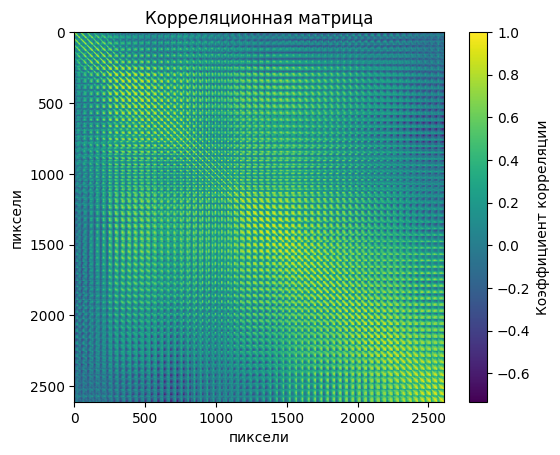

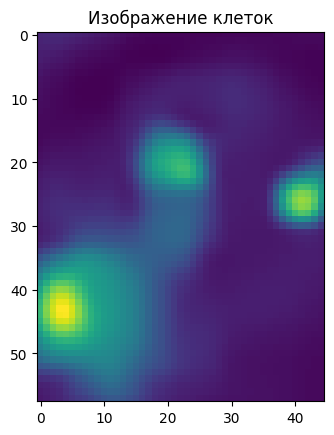

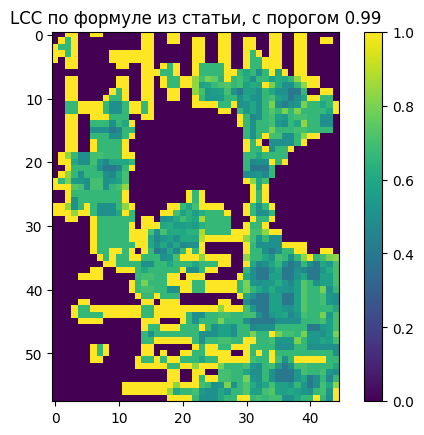

In [23]:
"""bildHist2d(35,53,120,139)
bildCorrArray(35,53,120,139)
bildHist2d(115,133,453,472)
bildCorrArray(115,133,453,472)
bildHist2d(90,115,350,380)
bildCorrArray(90,115,350,380)
bildHist2d(275,295,160,195)
bildCorrArray(275,295,160,195)
bildHist2d(70,113,475,512)
bildCorrArray(70,113,475,512)
bildHist2d(260,280,435,460)
bildCorrArray(260,280,435,460)
bildHist2d(400,418,25,50)"""
#bildCorrArray(400,418,25,50)
#matrixEvclideanDist(90,115,350,380)
#bildHist2d(35:53,120:139)



"""matrixEvclideanDist(35,53,120,139)

matrixEvclideanDist(115,133,453,472)

matrixEvclideanDist(90,115,350,380)

matrixEvclideanDist(275,295,160,195)

matrixEvclideanDist(70,113,475,512)

matrixEvclideanDist(260,280,435,460)"""

#bildHist2d(35,53,120,139)
#bildCorrArray(35,53,120,139)

#matrixEvclideanDist(390,448,15,60)
#tmp(390,448,15,60, 2, 2)
#pixelTakesCorrelationValue(390,448,15,60, 15, 23)
#definingCellBoundaries(390,448,15,60)
#corrPair(390,448,15,60)
#matrixEvclideanDist(400,418,25,50)

#matrixEvclideanDist(255,300,140,210)
#bildHist2d(390,448,15,60)
#linePaint(390,448,15,60)
#kdedensity(390,448,15,60)

corr_matrix = bildCorrArray(390,448,15,60)
cellOver1 = arr3D[:300, 390:448, 15:60]
#bildGraphOut(corr_matrix, cellOver1)
bildGraphOut2(corr_matrix, cellOver1)
# signalOut(cellOver1)
# #bildGraphOut2(corr_matrix, cellOver1)


In [24]:
img = cv2.imread("tser4_t0000.bmp", cv2.IMREAD_GRAYSCALE)
img = img[390:448,15:60]
img = cv2.GaussianBlur(img, (3, 3),0)
# Применение алгоритма Кенни с определенными порогами
edges = cv2.Canny(img, 27,130)
plt.imshow(edges)
plt.show()
#plt.imshow(img)
arrTmp = np.asarray(img)
arrTmp = cv2.GaussianBlur(arrTmp, (3, 3),0)
plt.imshow(img)
plt.colorbar()
plt.show()
print(arrTmp)


TypeError: 'NoneType' object is not subscriptable